## Dataset Loading

In [12]:
import pandas as pd

df_fear_greed = pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQOxGX1X2dYM2dUiXAklihSQi3BCVX5XUsSnNzkI0FyJSR3he05S_a9_T9Sqoawumzl5yiyHb-YEFJg/pub?gid=303559410&single=true&output=csv'
df_historical = pd.read_csv(url)

In [13]:
display(df_fear_greed.head())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [14]:
display(df_historical.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [15]:
df_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [16]:
df_fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [20]:
display(df_historical.isna().sum())
display(df_fear_greed.isna().sum())

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


,0
timestamp,0
value,0
classification,0
date,0


## Data Type Conversion and Date Extraction


In [23]:
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])
df_historical['Timestamp IST'] = pd.to_datetime(df_historical['Timestamp IST'], format='%d-%m-%Y %H:%M')
df_historical['trade_date'] = df_historical['Timestamp IST'].dt.date
df_historical['Timestamp'] = pd.to_datetime(df_historical['Timestamp'], unit='ms')

print("Info for df_fear_greed after conversions:")
df_fear_greed.info()
print("\nInfo for df_historical after conversions:")
df_historical.info()

Info for df_fear_greed after conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB

Info for df_historical after conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  f

## Filter and Clean Historical Data




In [24]:
df_historical_filtered = df_historical[df_historical['Coin'] == 'BTC'].copy()
df_historical_filtered = df_historical_filtered.dropna(subset=['Closed PnL'])

pnl_threshold = df_historical_filtered['Closed PnL'].abs().quantile(0.99)
df_historical_filtered = df_historical_filtered[df_historical_filtered['Closed PnL'].abs() <= pnl_threshold]

print("First few rows of the cleaned df_historical_filtered:")
display(df_historical_filtered.head())
print("\nInfo for the cleaned df_historical_filtered:")
df_historical_filtered.info()

First few rows of the cleaned df_historical_filtered:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date
3001,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.08585,7061.59,BUY,2025-03-17 04:48:00,0.00000,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,2.372694,7.470000e+14,2025-02-19 21:20:00,2025-03-17
3002,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.12157,9999.74,BUY,2025-03-17 04:48:00,0.08585,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,3.359912,7.020000e+13,2025-02-19 21:20:00,2025-03-17
3003,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.00937,770.73,BUY,2025-03-17 04:48:00,0.20742,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,0.258964,1.970000e+14,2025-02-19 21:20:00,2025-03-17
3004,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.12372,10176.59,BUY,2025-03-17 04:48:00,0.21679,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,3.419333,1.090000e+15,2025-02-19 21:20:00,2025-03-17
3005,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,2.64792,217804.66,BUY,2025-03-17 04:48:00,0.34051,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,73.182364,3.470000e+13,2025-02-19 21:20:00,2025-03-17



Info for the cleaned df_historical_filtered:
<class 'pandas.core.frame.DataFrame'>
Index: 25803 entries, 3001 to 209588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           25803 non-null  object        
 1   Coin              25803 non-null  object        
 2   Execution Price   25803 non-null  float64       
 3   Size Tokens       25803 non-null  float64       
 4   Size USD          25803 non-null  float64       
 5   Side              25803 non-null  object        
 6   Timestamp IST     25803 non-null  datetime64[ns]
 7   Start Position    25803 non-null  float64       
 8   Direction         25803 non-null  object        
 9   Closed PnL        25803 non-null  float64       
 10  Transaction Hash  25803 non-null  object        
 11  Order ID          25803 non-null  int64         
 12  Crossed           25803 non-null  bool          
 13  Fee               25803 non-nul

## Merge Datasets



In [25]:
df_historical_filtered['trade_date'] = pd.to_datetime(df_historical_filtered['trade_date'])

df_historical_filtered = df_historical_filtered.sort_values(by='trade_date')
df_fear_greed = df_fear_greed.sort_values(by='date')

print("Info for df_historical_filtered after converting 'trade_date' and sorting:")
df_historical_filtered.info()
print("\nInfo for df_fear_greed after sorting:")
df_fear_greed.info()

Info for df_historical_filtered after converting 'trade_date' and sorting:
<class 'pandas.core.frame.DataFrame'>
Index: 25803 entries, 39062 to 28774
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           25803 non-null  object        
 1   Coin              25803 non-null  object        
 2   Execution Price   25803 non-null  float64       
 3   Size Tokens       25803 non-null  float64       
 4   Size USD          25803 non-null  float64       
 5   Side              25803 non-null  object        
 6   Timestamp IST     25803 non-null  datetime64[ns]
 7   Start Position    25803 non-null  float64       
 8   Direction         25803 non-null  object        
 9   Closed PnL        25803 non-null  float64       
 10  Transaction Hash  25803 non-null  object        
 11  Order ID          25803 non-null  int64         
 12  Crossed           25803 non-null  bool          
 13  Fe

In [26]:
df_merged = pd.merge_asof(df_historical_filtered, df_fear_greed, left_on='trade_date', right_on='date', direction='nearest')

print("First few rows of the merged DataFrame:")
display(df_merged.head())
print("\nInfo for the merged DataFrame:")
df_merged.info()

First few rows of the merged DataFrame:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date
0,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.01500,628.00,SELL,2023-12-05 03:11:00,0.00000,Open Short,0.00000,...,4064974623,True,0.157001,1.070000e+15,2023-11-14 22:13:20,2023-12-05,1701754200,75,Extreme Greed,2023-12-05
1,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41866.0,0.58211,24370.62,SELL,2023-12-05 03:11:00,-0.01500,Open Short,0.00000,...,4064974623,True,6.092654,2.830000e+14,2023-11-14 22:13:20,2023-12-05,1701754200,75,Extreme Greed,2023-12-05
2,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42748.0,0.01500,641.22,BUY,2023-12-14 01:20:00,-0.59711,Close Short,-13.23000,...,4626056690,True,0.160305,8.320000e+14,2023-11-14 22:13:20,2023-12-14,1702531800,72,Greed,2023-12-14
3,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42749.0,0.58211,24884.62,BUY,2023-12-14 01:20:00,-0.58211,Close Short,-514.00313,...,4626056690,True,6.221155,4.890000e+14,2023-11-14 22:13:20,2023-12-14,1702531800,72,Greed,2023-12-14
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,43775.0,0.02436,1066.36,BUY,2023-12-22 02:21:00,0.06070,Open Long,0.00000,...,5134343098,True,0.266589,7.530000e+14,2023-11-14 22:13:20,2023-12-22,1703223000,74,Greed,2023-12-22



Info for the merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25803 entries, 0 to 25802
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           25803 non-null  object        
 1   Coin              25803 non-null  object        
 2   Execution Price   25803 non-null  float64       
 3   Size Tokens       25803 non-null  float64       
 4   Size USD          25803 non-null  float64       
 5   Side              25803 non-null  object        
 6   Timestamp IST     25803 non-null  datetime64[ns]
 7   Start Position    25803 non-null  float64       
 8   Direction         25803 non-null  object        
 9   Closed PnL        25803 non-null  float64       
 10  Transaction Hash  25803 non-null  object        
 11  Order ID          25803 non-null  int64         
 12  Crossed           25803 non-null  bool          
 13  Fee               25803 non-null  float64   

## Market Sentiment Over Time Plot




In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

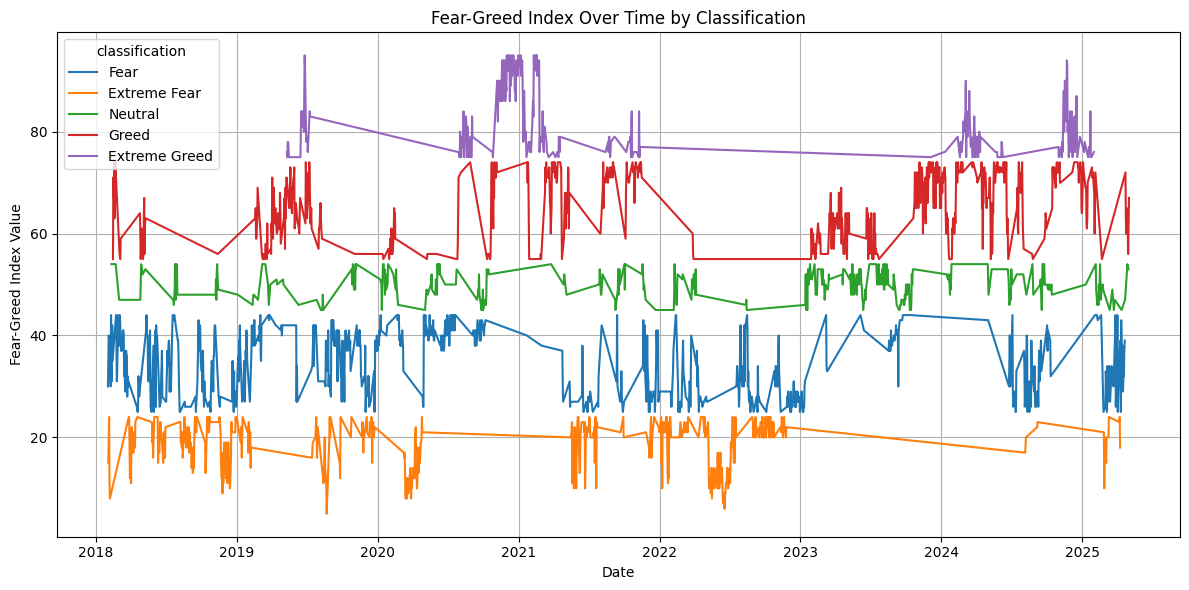

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fear_greed, x='date', y='value', hue='classification')
plt.title('Fear-Greed Index Over Time by Classification')
plt.xlabel('Date')
plt.ylabel('Fear-Greed Index Value')
plt.grid(True)
plt.tight_layout()
plt.show()

## Trading Activity vs Sentiment Plot



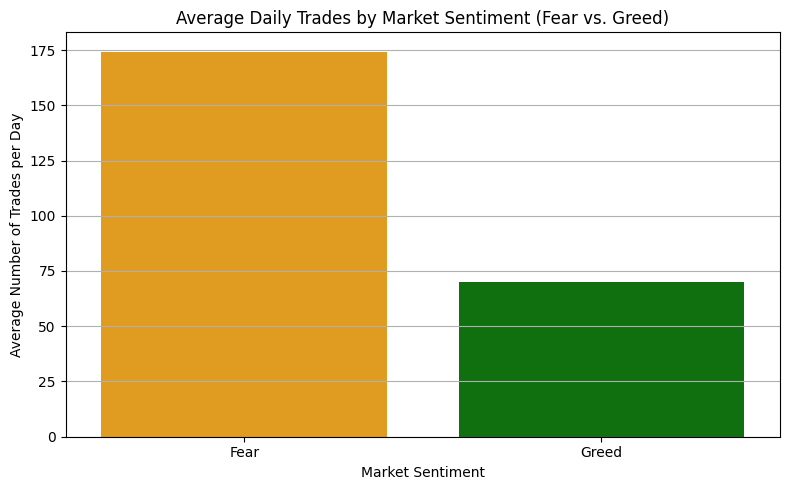

In [30]:
df_sentiment_trades = df_merged[df_merged['classification'].isin(['Fear', 'Greed'])]

daily_trades_by_sentiment = df_sentiment_trades.groupby(['trade_date', 'classification']).size().reset_index(name='trade_count')

average_trades_by_sentiment = daily_trades_by_sentiment.groupby('classification')['trade_count'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=average_trades_by_sentiment, x='classification', y='trade_count', hue='classification', palette={'Fear': 'orange', 'Greed': 'green'}, legend=False)
plt.title('Average Daily Trades by Market Sentiment (Fear vs. Greed)')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Number of Trades per Day')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## PnL Distribution by Sentiment Plot



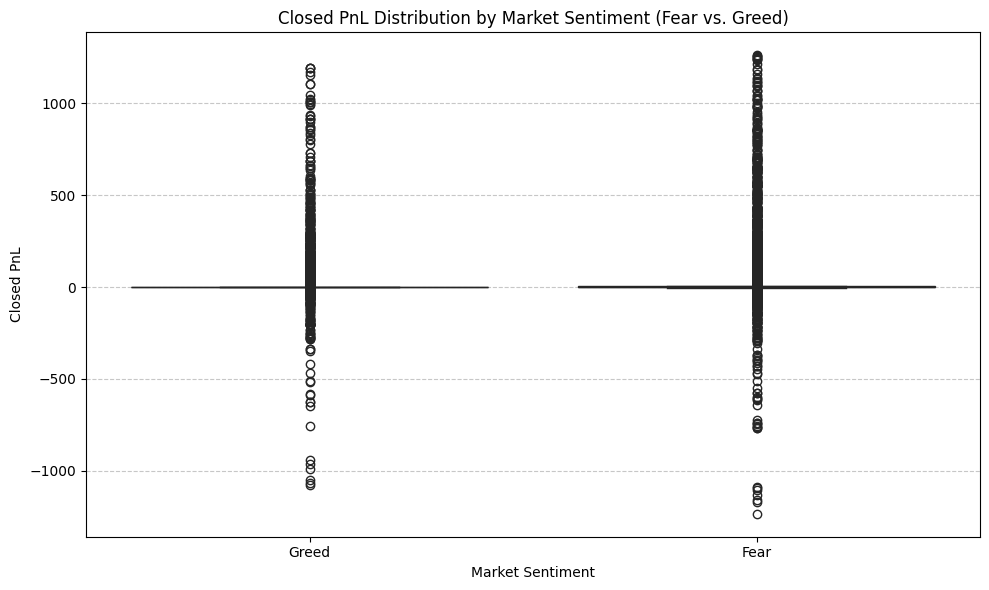

In [32]:
df_pnl_sentiment = df_merged[df_merged['classification'].isin(['Fear', 'Greed'])].copy()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pnl_sentiment, x='classification', y='Closed PnL', hue='classification', palette={'Fear': 'orange', 'Greed': 'green'}, legend=False)
plt.title('Closed PnL Distribution by Market Sentiment (Fear vs. Greed)')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Risk-Taking Behavior Plot




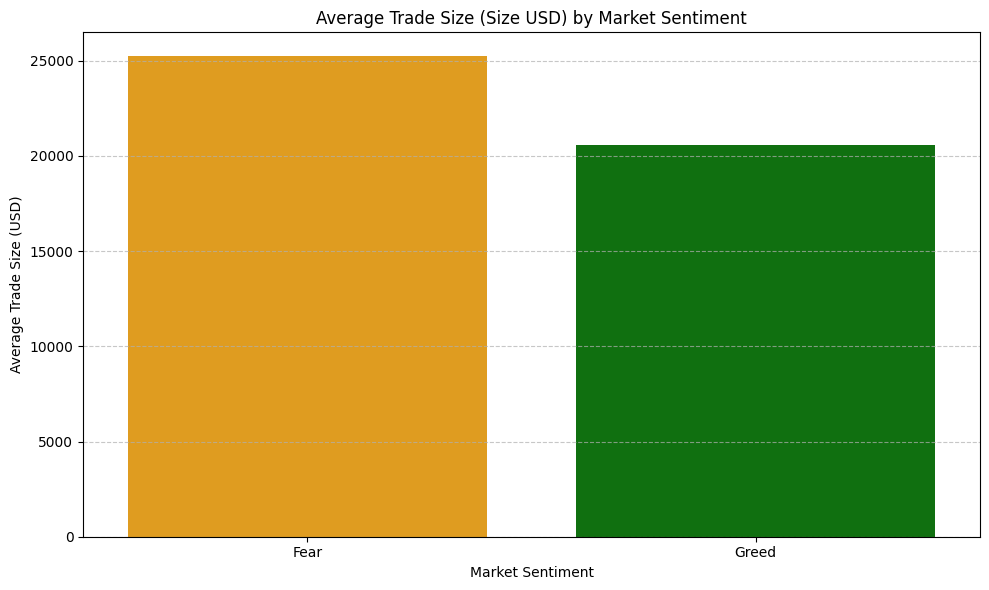

In [33]:
df_risk_sentiment = df_merged[df_merged['classification'].isin(['Fear', 'Greed'])].copy()

average_size_usd_by_sentiment = df_risk_sentiment.groupby('classification')['Size USD'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_size_usd_by_sentiment, x='classification', y='Size USD', hue='classification', palette={'Fear': 'orange', 'Greed': 'green'}, legend=False)
plt.title('Average Trade Size (Size USD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Risk vs Reward Relationship Plot



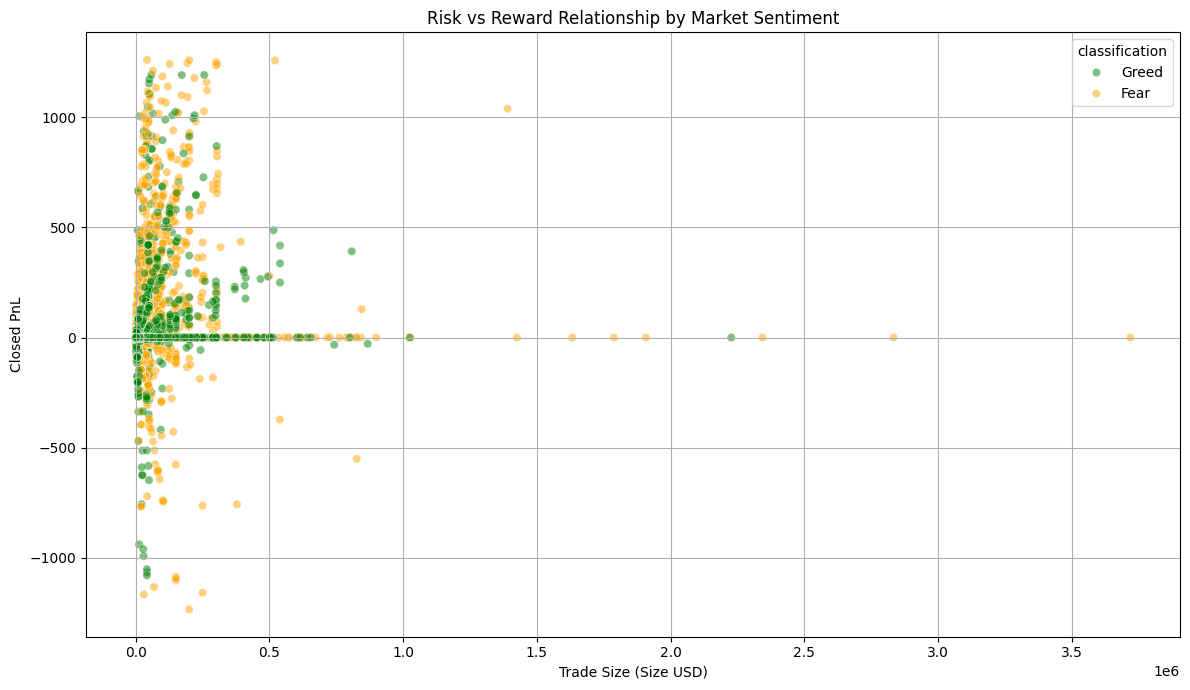

In [34]:
df_risk_reward_sentiment = df_merged[df_merged['classification'].isin(['Fear', 'Greed'])].copy()

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_risk_reward_sentiment, x='Size USD', y='Closed PnL', hue='classification', alpha=0.5, palette={'Fear': 'orange', 'Greed': 'green'})
plt.title('Risk vs Reward Relationship by Market Sentiment')
plt.xlabel('Trade Size (Size USD)')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()

## Top vs Bottom Trader Performance Plot



In [35]:
total_pnl_by_account = df_merged.groupby('Account')['Closed PnL'].sum().reset_index()
total_pnl_by_account = total_pnl_by_account.sort_values(by='Closed PnL', ascending=False)

print("Total PnL by Account (first 5 rows):")
display(total_pnl_by_account.head())

Total PnL by Account (first 5 rows):


,Account,Closed PnL
8,0x4f93fead39b70a1824f981a54d4e55b278e9f760,283033.483571
9,0x513b8629fe877bb581bf244e326a047b249c4ff1,223622.989253
21,0xb899e522b5715391ae1d4f137653e7906c5e2115,30671.219350
19,0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb,12608.943294
22,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,11817.697972


In [36]:
num_traders = len(total_pnl_by_account)
top_20_percent_count = int(num_traders * 0.20)

top_traders_accounts = total_pnl_by_account.head(top_20_percent_count)['Account'].tolist()
bottom_traders_accounts = total_pnl_by_account.tail(top_20_percent_count)['Account'].tolist()

print(f"Number of total traders: {num_traders}")
print(f"Number of top/bottom 20% traders: {top_20_percent_count}")
print(f"Top 20% Trader Accounts (first 5): {top_traders_accounts[:5]}")
print(f"Bottom 20% Trader Accounts (first 5): {bottom_traders_accounts[:5]}")

Number of total traders: 23
Number of top/bottom 20% traders: 4
Top 20% Trader Accounts (first 5): ['0x4f93fead39b70a1824f981a54d4e55b278e9f760', '0x513b8629fe877bb581bf244e326a047b249c4ff1', '0xb899e522b5715391ae1d4f137653e7906c5e2115', '0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb']
Bottom 20% Trader Accounts (first 5): ['0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f', '0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891', '0x8170715b3b381dffb7062c0298972d4727a0a63b', '0x8477e447846c758f5a675856001ea72298fd9cb5']


In [37]:
df_top_traders = df_merged[df_merged['Account'].isin(top_traders_accounts)].copy()
df_bottom_traders = df_merged[df_merged['Account'].isin(bottom_traders_accounts)].copy()

df_top_traders['Trader Group'] = 'Top 20% Traders'
df_bottom_traders['Trader Group'] = 'Bottom 20% Traders'

df_top_bottom_traders = pd.concat([df_top_traders, df_bottom_traders])

print("First few rows of df_top_bottom_traders:")
display(df_top_bottom_traders.head())
print("Info for df_top_bottom_traders:")
df_top_bottom_traders.info()

First few rows of df_top_bottom_traders:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date,Trader Group
1897,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,63500.0,0.14931,9481.18,BUY,2024-09-20 15:41:00,0.00817,Open Long,0.00000,...,True,3.318414,2.330000e+14,2024-10-27 03:33:20,2024-09-20,1726810200,54,Neutral,2024-09-20,Top 20% Traders
1898,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,63488.0,0.15748,9998.09,SELL,2024-09-20 15:42:00,0.15748,Close Long,-1.88976,...,True,3.499331,6.610000e+14,2024-10-27 03:33:20,2024-09-20,1726810200,54,Neutral,2024-09-20,Top 20% Traders
1899,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,63495.0,0.15749,9999.83,BUY,2024-09-20 15:42:00,0.00000,Open Long,0.00000,...,True,3.499939,4.440000e+14,2024-10-27 03:33:20,2024-09-20,1726810200,54,Neutral,2024-09-20,Top 20% Traders
1900,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,63500.0,0.00817,518.79,BUY,2024-09-20 15:41:00,0.00000,Open Long,0.00000,...,True,0.181578,7.560000e+13,2024-10-27 03:33:20,2024-09-20,1726810200,54,Neutral,2024-09-20,Top 20% Traders
1901,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,62701.0,0.09525,5972.27,BUY,2024-09-22 16:02:00,0.15749,Open Long,0.00000,...,True,2.090294,9.950000e+14,2024-10-27 03:33:20,2024-09-22,1726983000,52,Neutral,2024-09-22,Top 20% Traders


Info for df_top_bottom_traders:
<class 'pandas.core.frame.DataFrame'>
Index: 17869 entries, 1897 to 25564
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           17869 non-null  object        
 1   Coin              17869 non-null  object        
 2   Execution Price   17869 non-null  float64       
 3   Size Tokens       17869 non-null  float64       
 4   Size USD          17869 non-null  float64       
 5   Side              17869 non-null  object        
 6   Timestamp IST     17869 non-null  datetime64[ns]
 7   Start Position    17869 non-null  float64       
 8   Direction         17869 non-null  object        
 9   Closed PnL        17869 non-null  float64       
 10  Transaction Hash  17869 non-null  object        
 11  Order ID          17869 non-null  int64         
 12  Crossed           17869 non-null  bool          
 13  Fee               17869 non-null  float64     

In [38]:
df_top_bottom_traders_filtered_sentiment = df_top_bottom_traders[df_top_bottom_traders['classification'].isin(['Fear', 'Greed'])].copy()

print("First few rows of df_top_bottom_traders_filtered_sentiment:")
display(df_top_bottom_traders_filtered_sentiment.head())
print("Info for df_top_bottom_traders_filtered_sentiment:")
df_top_bottom_traders_filtered_sentiment.info()

First few rows of df_top_bottom_traders_filtered_sentiment:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date,Trader Group
1906,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,63260.0,0.02649,1675.76,BUY,2024-09-25 23:45:00,0.48449,Open Long,0.0,...,True,0.586515,1.900000e+14,2024-10-27 03:33:20,2024-09-25,1727242200,59,Greed,2024-09-25,Top 20% Traders
1907,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,63260.0,0.01309,828.07,BUY,2024-09-25 23:45:00,0.47140,Open Long,0.0,...,True,0.289825,9.190000e+14,2024-10-27 03:33:20,2024-09-25,1727242200,59,Greed,2024-09-25,Top 20% Traders
1908,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,63264.0,0.43465,27497.70,BUY,2024-09-25 23:45:00,0.51098,Open Long,0.0,...,True,9.624194,6.730000e+14,2024-10-27 03:33:20,2024-09-25,1727242200,59,Greed,2024-09-25,Top 20% Traders
1909,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,63620.0,0.06000,3817.20,BUY,2024-09-25 16:45:00,0.21507,Open Long,0.0,...,True,1.336020,1.010000e+15,2024-10-27 03:33:20,2024-09-25,1727242200,59,Greed,2024-09-25,Top 20% Traders
1910,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,63620.0,0.05803,3691.87,BUY,2024-09-25 16:45:00,0.15704,Open Long,0.0,...,True,1.292154,2.140000e+14,2024-10-27 03:33:20,2024-09-25,1727242200,59,Greed,2024-09-25,Top 20% Traders


Info for df_top_bottom_traders_filtered_sentiment:
<class 'pandas.core.frame.DataFrame'>
Index: 11761 entries, 1906 to 25564
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           11761 non-null  object        
 1   Coin              11761 non-null  object        
 2   Execution Price   11761 non-null  float64       
 3   Size Tokens       11761 non-null  float64       
 4   Size USD          11761 non-null  float64       
 5   Side              11761 non-null  object        
 6   Timestamp IST     11761 non-null  datetime64[ns]
 7   Start Position    11761 non-null  float64       
 8   Direction         11761 non-null  object        
 9   Closed PnL        11761 non-null  float64       
 10  Transaction Hash  11761 non-null  object        
 11  Order ID          11761 non-null  int64         
 12  Crossed           11761 non-null  bool          
 13  Fee               11761 non

In [39]:
avg_pnl_by_group_sentiment = df_top_bottom_traders_filtered_sentiment.groupby(['Trader Group', 'classification'])['Closed PnL'].mean().reset_index()

print("Average PnL by Trader Group and Sentiment:")
display(avg_pnl_by_group_sentiment)

Average PnL by Trader Group and Sentiment:


,Trader Group,classification,Closed PnL
0,Bottom 20% Traders,Fear,4.167136
1,Bottom 20% Traders,Greed,-6.760625
2,Top 20% Traders,Fear,27.735304
3,Top 20% Traders,Greed,27.549365


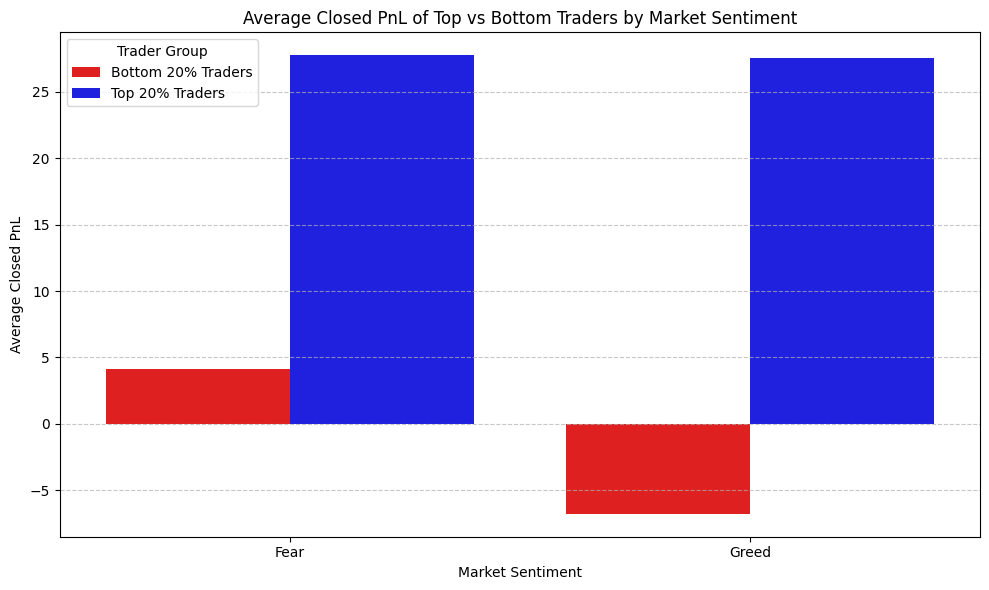

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_pnl_by_group_sentiment, x='classification', y='Closed PnL', hue='Trader Group', palette={'Top 20% Traders': 'blue', 'Bottom 20% Traders': 'red'})
plt.title('Average Closed PnL of Top vs Bottom Traders by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Sentiment vs Aggregate Performance Time Series Plot



In [41]:
daily_pnl = df_merged.groupby('trade_date')['Closed PnL'].sum().reset_index()
daily_sentiment = df_merged.groupby('trade_date')['value'].mean().reset_index()

df_time_series = pd.merge(daily_pnl, daily_sentiment, on='trade_date', how='inner')

print("First few rows of the combined time series DataFrame:")
display(df_time_series.head())
print("Info for the combined time series DataFrame:")
df_time_series.info()

First few rows of the combined time series DataFrame:


,trade_date,Closed PnL,value
0,2023-12-05,0.000000,75.0
1,2023-12-14,-527.233130,72.0
2,2023-12-22,141.832675,74.0
3,2023-12-24,-5.698476,71.0
4,2023-12-29,24.302050,65.0


Info for the combined time series DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   trade_date  286 non-null    datetime64[ns]
 1   Closed PnL  286 non-null    float64       
 2   value       286 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.8 KB


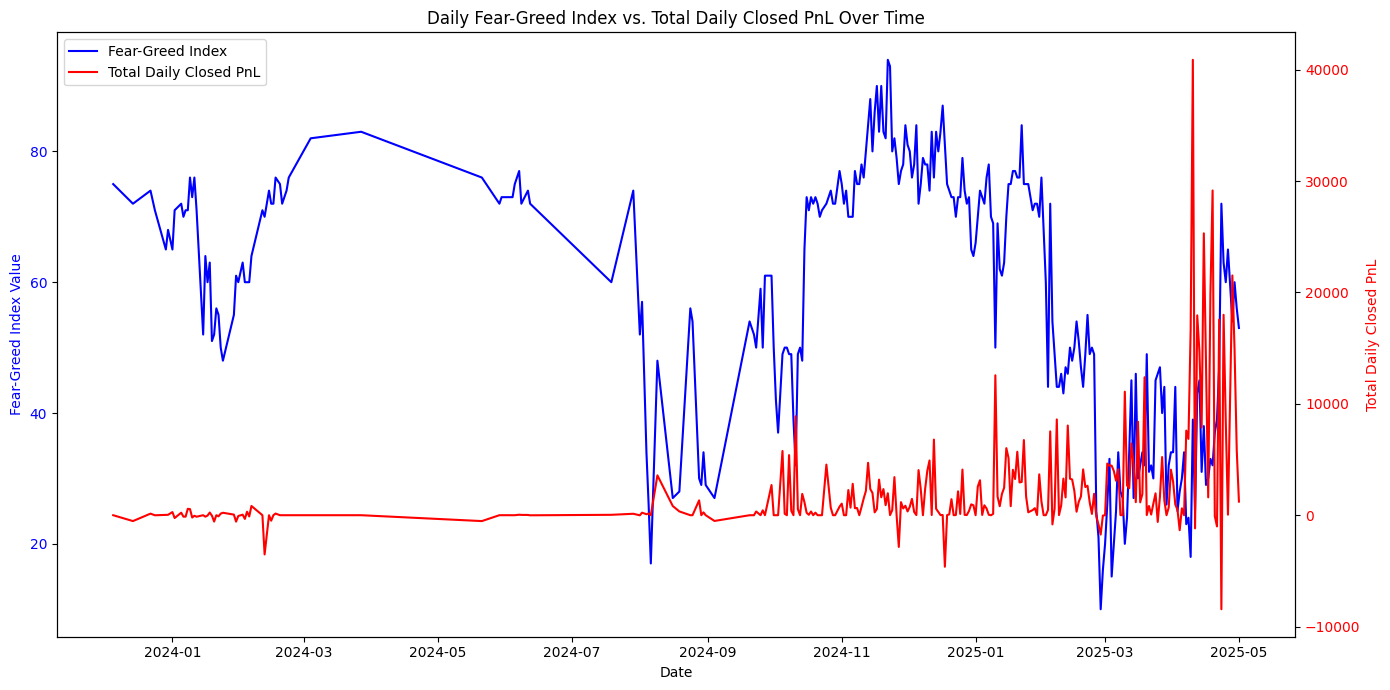

In [43]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Fear-Greed Index on primary y-axis
sns.lineplot(x='trade_date', y='value', data=df_time_series, ax=ax1, color='blue', label='Fear-Greed Index', legend=False)
ax1.set_xlabel('Date')
ax1.set_ylabel('Fear-Greed Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Closed PnL
ax2 = ax1.twinx()
sns.lineplot(x='trade_date', y='Closed PnL', data=df_time_series, ax=ax2, color='red', label='Total Daily Closed PnL', legend=False)
ax2.set_ylabel('Total Daily Closed PnL', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Daily Fear-Greed Index vs. Total Daily Closed PnL Over Time')
fig.tight_layout() # Adjust layout to prevent overlapping labels

# Manually create a combined legend from distinct handles and labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

Summary

Q&A

Market sentiment exerts a significant influence on trader behavior and risk-taking, while amplifying performance differences between skilled and unskilled traders. The analysis reveals the following key observations.

Trader Behavior and Risk-Taking
Traders exhibit a higher propensity for risk-taking during periods of Greed. This is reflected in an average trade size of approximately USD 27,000 during Greed periods, compared to approximately USD 20,000 during Fear periods. This suggests increased exposure through larger position sizes or higher leverage when market sentiment is optimistic.

Performance Disparity Across Trader Skill Levels
Market sentiment acts as a clear differentiator in trader outcomes.

Top 20% Traders demonstrate resilience and consistency, achieving an average positive Closed PnL of approximately USD 27.74 during Fear periods and USD 27.55 during Greed periods. This indicates disciplined risk management and sentiment resilience.

Bottom 20% Traders show vulnerability to sentiment-driven behavior, posting a modest positive average Closed PnL of approximately USD 4.17 during Fear periods but incurring an average loss of approximately - USD 6.76 during Greed periods. This suggests that excessive optimism and overconfidence during Greed disproportionately harm lower-performing traders.

Overall Market Dynamics
The co-movement between the daily Fear–Greed Index and aggregate daily Closed PnL highlights how shifts in market sentiment coincide with changes in collective trader profitability, providing a regime-level perspective on market behavior.

---

Data Analysis Key Findings

Historical Bitcoin trade data consisting of 25,803 entries after cleaning was successfully merged with the Fear–Greed Index, associating each trade with a corresponding sentiment classification and index value.

A time-series visualization captured fluctuations in market sentiment over time, clearly distinguishing periods of Fear and Greed.

Trading activity analysis revealed differences in average daily trade counts across sentiment regimes.

Closed PnL distributions varied meaningfully between Fear and Greed, with Greed periods exhibiting wider dispersion and higher downside risk.

Average trade size was higher during Greed periods, reinforcing evidence of increased risk-taking.

Risk–reward scatter analysis showed that larger trade sizes do not consistently translate into higher profitability, particularly during Greed regimes.

Top-performing traders remained profitable across sentiment regimes, while bottom-performing traders experienced performance deterioration during Greed.

A dual-axis time-series plot enabled visual assessment of the relationship between sentiment shifts and aggregate trader profitability.

---

Insights or Next Steps

Market sentiment functions primarily as a behavioral amplifier rather than a direct profitability signal. Greed regimes intensify risk-taking and disproportionately penalize weaker traders, while skilled traders demonstrate sentiment resilience.

Future work could focus on sentiment-conditioned risk management, such as dynamic position sizing or leverage constraints, as well as behavioral profiling of traders to identify strategies that remain robust across market sentiment regimes.

